<a href="https://colab.research.google.com/github/Tina-Mulu/Carrefour-Market-Analysis-using-R-.-Unsupervised-Learning/blob/main/Carrefour_data_analysis_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading the dataset
sales <- read.csv(file = 'Supermarket_Dataset_1 - Sales Data.csv')

In [ ]:
# Previewing our dataset
# 
head(sales)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
tail(sales)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
995,652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [ ]:
# Installing Rtnse package
# 
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Loading our tnse library
# 
library(Rtsne)

In [ ]:
# Curating the database for analysis 
# 
total <- sales$Total
sales$Total<-as.factor(sales$Total)

In [ ]:
# For plotting
#
colors = rainbow(length(unique(sales$Total)))
names(colors) = unique(sales$Total)


In [ ]:
# Executing the algorithm on curated data
# 
tsne <- Rtsne(sales[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

# Getting the duration of execution
# 
exeTimeTsne <- system.time(Rtsne(sales[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))


Performing PCA
Read the 1000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.102660)!
Learning embedding...
Iteration 50: error is 59.534325 (50 iterations in 0.16 seconds)
Iteration 100: error is 52.748096 (50 iterations in 0.13 seconds)
Iteration 150: error is 51.709038 (50 iterations in 0.13 seconds)
Iteration 200: error is 51.289407 (50 iterations in 0.13 seconds)
Iteration 250: error is 51.051101 (50 iterations in 0.13 seconds)
Iteration 300: error is 0.569445 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.407365 (50 iterations in 0.13 seconds)
Iteration 400: error is 0.368547 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.355094 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.345956 (50 iterations in 0.13 seconds)
Fitting performed in 1.32 seconds.
Performing PCA
Read the 1000 x 50 data mat

Warning message in text.default(tsne$Y, total = sales$Total, col = colors[sales$Total]):
“"total" is not a graphical parameter”


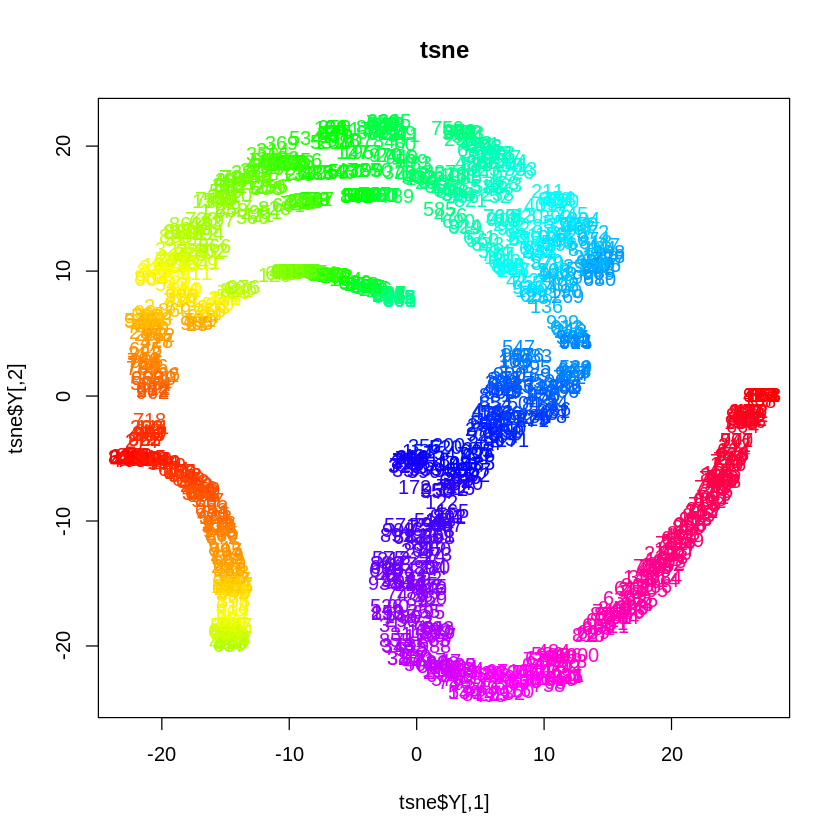

In [ ]:
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, total=sales$Total, col=colors[sales$Total])